In [1]:
#https://medium.com/analytics-vidhya/a-b-testing-a-python-approach-part-1-75fdb904f271
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!ls

archive.zip
cookie_cats.csv
newletter_convertion_data.csv
newletter_to_website_traffic_convertion.ipynb
old_vs_new_game_release_model.ipynb
ttest.py
Untitled.ipynb


In [24]:
cookie_cats = pd.read_csv("cookie_cats.csv")
cookie_cats[0:10]


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [4]:
cookie_cats.index

RangeIndex(start=0, stop=90189, step=1)

In [5]:
cookie_cats_user_stat=cookie_cats[cookie_cats['userid']==1444]
cookie_cats_user_stat

,userid,version,sum_gamerounds,retention_1,retention_7
7,1444,gate_40,2,False,False


In [6]:
cookie_cats['version'].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

- `userid`: A unique number that identifies each player.
- `version`: Whether the player was put in the control group (gate_30 — a gate at level 30) or the group with the moved gate (gate_40 — a gate at level 40).
- `sum_gamerounds`: The number of game rounds played by the player during the first 14 days after install.
- `retention_1`: The player come back and play 1 day after installing?
- `retention_7`: The player come back and play 7 days after installing?

In [7]:
cookie_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [8]:
cookie_cats['retention_1'].value_counts()

False    50036
True     40153
Name: retention_1, dtype: int64

In [9]:
# convert boolean to numerical
def binary_map(x):
    return x.map({True: 1, False: 0})

In [25]:
# apply inary_map() func to bool fields
binary_var = ['retention_1', 'retention_7']
cookie_cats[binary_var] = cookie_cats[binary_var].apply(binary_map)
cookie_cats.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


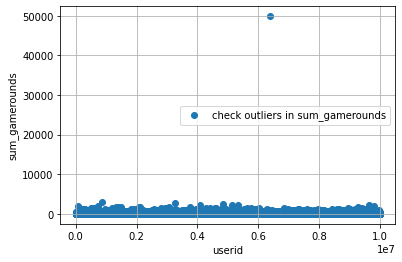

In [26]:
# check outliers in sum_gamerounds
plt.scatter(cookie_cats.userid, cookie_cats['sum_gamerounds'], label='check outliers in sum_gamerounds')
plt.xlabel('userid')
plt.ylabel('sum_gamerounds')
plt.grid(True)
plt.legend()
plt.show()

In [30]:
#check the details for these outliers
len(pd.DataFrame(cookie_cats[cookie_cats['sum_gamerounds'] > 10000]))

1

In [31]:
# removing this outliers
cookie_cats=cookie_cats[cookie_cats['sum_gamerounds'] < 10000]
cookie_cats.shape

(90188, 5)

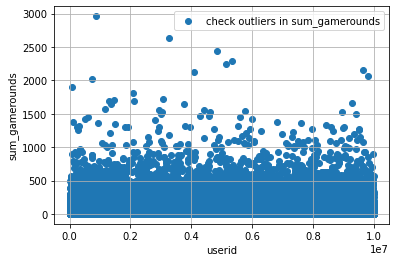

In [33]:
# check outliers in sum_gamerounds
plt.scatter(cookie_cats.userid, cookie_cats['sum_gamerounds'], label='check outliers in sum_gamerounds')
plt.xlabel('userid')
plt.ylabel('sum_gamerounds')
plt.grid(True)
plt.legend()
plt.show()

In [19]:
cookie_cats.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             91,  92,  93,  94,  95,  96,  97,  98,  99, 100],
           dtype='int64', length=101)

In [17]:
# there are two gropus 
# game_30 - Control group
# game_40 - Experinet/Test group


In [34]:
control_df=cookie_cats[cookie_cats['version']=='gate_30']
test_df=cookie_cats[cookie_cats['version']=='gate_40']
print(control_df.shape)
print(test_df.shape)

(44699, 5)
(45489, 5)


In [35]:
control_df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
6,1066,gate_30,0,0,0
11,2101,gate_30,0,0,0
13,2179,gate_30,39,1,0


In [36]:
test_df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1
5,540,gate_40,187,1,1
7,1444,gate_40,2,0,0


In [37]:
control_df['retention_1'].value_counts()

0    24665
1    20034
Name: retention_1, dtype: int64

In [43]:
control_df['retention_1'].sum() + control_df['retention_7'].sum()

28535

In [40]:
version=['gate_40', 'gate_30']
total_games_played_for_control_grp = (sum(control_df['retention_1']) + sum(control_df['retention_7']))
total_games_played_for_test_grp = (sum(test_df['retention_1']) + sum(test_df['retention_7']))                                     
total_games_player=[total_games_played_for_control_grp,total_games_played_for_test_grp]
                   
total_users=[control_df.shape[0], test_df.shape[0]]
avg_game_play=[]
min_game_play=[]
max_game_play=[]

list_of_tuples = list(zip(version,total_users,total_games_player))

In [44]:
summary_df=pd.DataFrame(list_of_tuples, columns=['version','total_users','total_games_player_retent'])
summary_df

,version,total_users,total_games_player_retent
0,gate_40,44699,28535
1,gate_30,45489,28398
